<h1><p style="text-align:center">Outlier Detection in Time Series</p></h1>

<h3>Outlier:- </h3><p> An outlier is a data/observation which is abnormally away from other observations in given sample/population data</p>

In [1]:
# Importing packages

import pandas as pd 
import numpy as np
import datetime as dt
import pandas_datareader.data as web
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from datetime import timedelta
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Data is accessed from internet(Yahoo Finance) with help of DataReader 

start = dt.datetime.now() - timedelta(weeks=52) #StartDate being 1 year from today
end =  dt.datetime.now() #EndDate being today

<p>Stock prices of <b>Google</b> are used for analysis below</p><br><p>We can analyze data of other companies which are present on Yahoo Finance</p>

In [3]:
#Google is referred as GOOGL on Yahoo Finance.
stocks = web.DataReader(['GOOGL'], 'yahoo', start, end) #Reading the stock prices between startDate and endDate
stocks_close = pd.DataFrame(web.DataReader(['GOOGL'], 'yahoo', start, end)['Close']) #Closing Price of Stock
stocks.head()

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,,
2020-08-03,1482.760010,1482.760010,1497.729980,1471.719971,1491.000000,2274100
2020-08-04,1473.300049,1473.300049,1493.109985,1464.030029,1486.709961,1860600
2020-08-05,1479.089966,1479.089966,1490.000000,1471.219971,1476.819946,1456700
2020-08-06,1504.949951,1504.949951,1506.270020,1471.900024,1476.150024,1665300
2020-08-07,1498.369995,1498.369995,1520.089966,1486.270020,1509.040039,1385900


In [14]:
# Area chart is used to display the stock prices of 

area_chart = px.area(stocks_close.GOOGL, title = 'Google SHARE PRICE')

area_chart.update_xaxes(title_text = 'Date')
area_chart.update_yaxes(title_text = 'Google Close Price', tickprefix = '$')
area_chart.update_layout(showlegend = False)

area_chart.show()

<h4><p>Univariate Analysis</p></h4>

In [5]:
stock_values = stocks_close.values.ravel() #Making it a 1-D array
stock_date = stocks_close.index #Dates are used as index in DataFrame

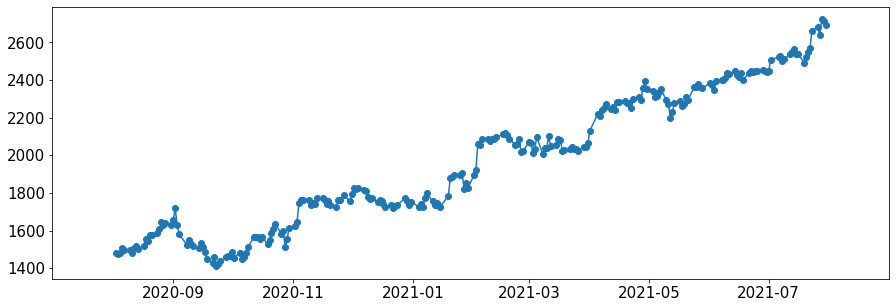

In [23]:
plt.scatter(stock_date,stock_values)
plt.plot(stock_date, stock_values)
plt.rc('figure', figsize=(12, 5))
plt.show()

<h4><p>Multivariate Analysis</p></h4>

In [7]:
#Dividing a year's data in 2 parts
first_half_year_mark = round(len(stock_date)/2)

In [8]:
first_half = stocks_close[0:first_half_year_mark]
second_half = stocks_close[first_half_year_mark:]

stock_values_1 = first_half.values.ravel() #Making it a 1-D array
stock_date_1 = first_half.index #Dates are used as index in DataFrame

In [9]:
stock_values_2 = second_half.values.ravel() #Making it a 1-D array
stock_date_2 = second_half.index #Dates are used as index in DataFrame

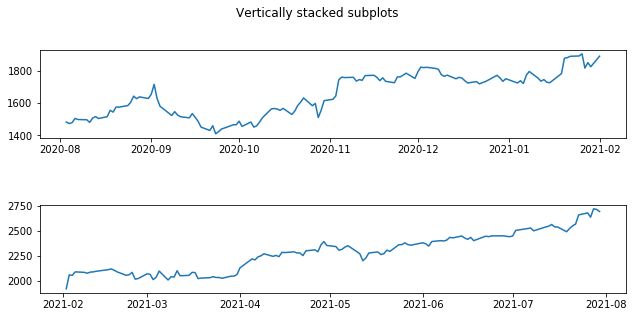

In [10]:
#Plotting 6-monthly data together
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(stock_date_1, stock_values_1)
axs[1].plot(stock_date_2, stock_values_2)
fig.tight_layout(pad=5.0)
plt.rc('figure', figsize=(10,8))
plt.show()

<h3><p>Outlier Detection Techniques</p></h3>

<h4><p>STL decomposition</p></h4>

<p>STL is seasonal-trend decomposition of time series which divides the data into seasonal, trend and residual</p>

In [11]:
df = pd.DataFrame({'data': stock_values}, index=stock_date)

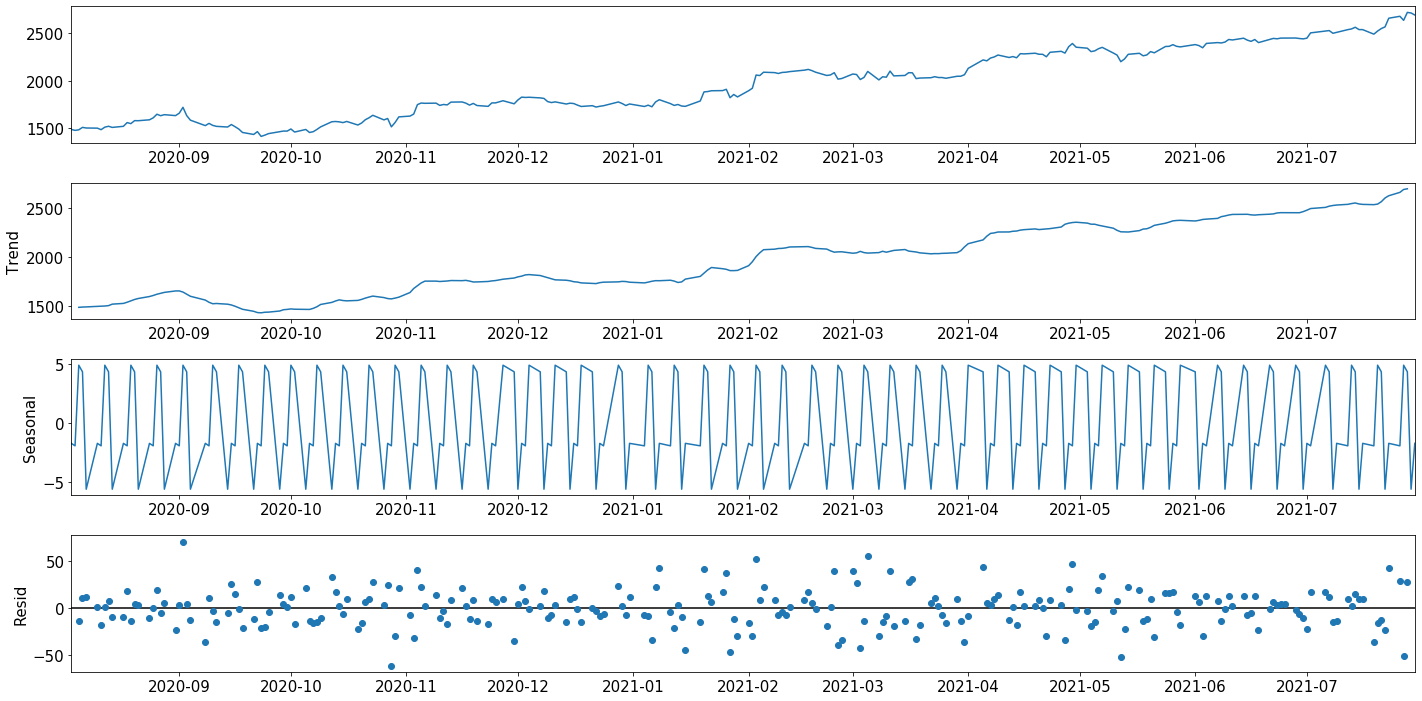

In [12]:
plt.rc('figure',figsize=(20,10))
plt.rc('font',size=15)
result =  seasonal_decompose(df, model='additive', period=5).plot()

<p>Further working on residual data to detect outlier/anamoly</p>

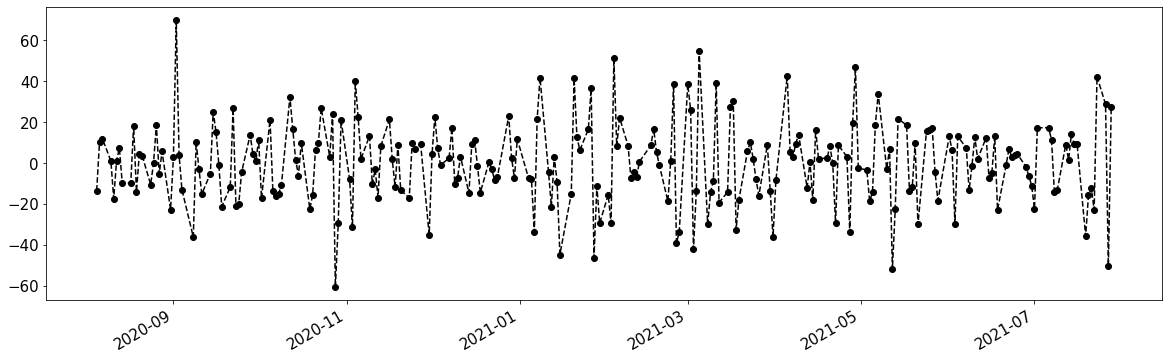

In [15]:
result =  seasonal_decompose(df, model='additive', period=5)
plt.rc('figure',figsize=(20,6))
plt.rc('font',size=15)
fig, ax = plt.subplots()
x = result.resid.index
y = result.resid.values
ax.plot_date(x, y, color='black',linestyle='--')
fig.autofmt_xdate()
plt.show()

<p style="text-align:center">Residual from STL analysis</p>

<h3><p>Classification and Regression Trees (CART)</p></h3>

In [16]:
#Isolation Forest to find outlier without any training dataset
outliers_fraction = float(.01)
scaler = StandardScaler()
np_scaled = scaler.fit_transform(stocks_close.values.reshape(-1, 1)) #returns 1 for normal,-1 for outlier
data = pd.DataFrame(np_scaled)
# train isolation forest
model =  IsolationForest(contamination=outliers_fraction)
model.fit(data)

IsolationForest(contamination=0.01)

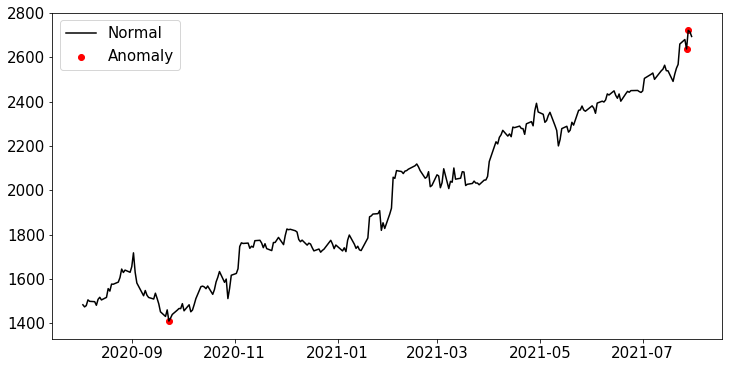

In [21]:
df['anomaly'] = model.predict(data)
# visualization
fig, ax = plt.subplots(figsize=(12,6))
a = df.loc[df['anomaly'] == -1, ['data']] #anomaly
ax.plot(df.index, df['data'], color='black', label = 'Normal')
ax.scatter(a.index,a['data'], color='red', label = 'Anomaly')
plt.legend()
plt.show()

In [20]:
#Outliers
print(a)

                   data
Date                   
2020-09-23  1409.390015
2021-07-27  2638.000000
2021-07-28  2721.879883
